Importing Dependencies and DataSet

In [2]:
import pandas as pd

df = pd.read_csv('C:\\Users\\iampr\\OneDrive\\Documents\\GitHub\\CV-Project-AirBNB\\AirBNB.csv')

C:\Users\iampr\AppData\Local\Temp\ipykernel_10492\401987548.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\iampr\\OneDrive\\Documents\\GitHub\\CV-Project-AirBNB\\AirBNB.csv')


In [3]:
for feature in df.columns:
    print(feature, end=' ')

id room_type accommodates bathrooms cancellation_policy cleaning_fee instant_bookable review_scores_rating bedrooms beds log_price 

In [4]:
df.shape

(74111, 11)

In [5]:
df.head(3)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734


In [6]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [7]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1) # axis = 1(Col), 0(Row)

In [7]:
# Droping the rows where it has null values
df = df.dropna(subset=['bedrooms', 'beds'])

In [8]:
# Calculate the number of bathrooms based on the number of bedrooms
df['bathrooms'] = df.apply(lambda row: row['bedrooms']-1 if pd.isna(row['bathrooms']) and row['bedrooms'] > 1 else 1 if pd.isna(row['bathrooms']) and row['bedrooms'] == 1 else 0 if pd.isna(row['bathrooms']) and row['bedrooms'] == 0 else row['bathrooms'], axis=1)

In [9]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                   0
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16651
bedrooms                    0
beds                        0
log_price                   0
dtype: int64

In [10]:
mode = df['room_type'].mode()[0]
mode

'Entire home/apt'

In [11]:
mode_ac = df['accommodates'].mode()[0]
mode_ac

2.0

In [12]:
df['accommodates'] = df['accommodates'].fillna(mode_ac)
df['room_type'] = df['room_type'].fillna(mode)

In [13]:
# Droping the rows where it has null values
df = df.dropna(subset=['cancellation_policy', 'cleaning_fee'])

In [14]:
df = df.drop('review_scores_rating', axis=1)

In [15]:
df.head(2)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,3.0,3.0,5.129899


In [16]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee','instant_bookable'],drop_first=True)

In [17]:
df.head(3)

,id,accommodates,bathrooms,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,6901257,3.0,1.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,6304928,7.0,1.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,7919400,5.0,1.0,1.0,3.0,4.976734,0,0,1,0,1,1


In [18]:
X = df.drop(["log_price"], axis=1)
y = df["log_price"]

In [19]:
Y = df["log_price"].rename("log_price")
# Capital Y variable

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

LinearRegression

In [23]:
# Fit the linear regression model to the training data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
# Compute the mean squared error using cross-validation
mse = -cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=5)

In [27]:
# Print the intercept and coefficients
print("Intercept: ", lm.intercept_)
print("Coefficients: ", lm.coef_)

Intercept:  4.633927209131372
Coefficients:  [ 0.07815587  0.14672651  0.15823139 -0.05313185 -0.64490642 -1.10458383
 -0.06056282 -0.01783627 -0.06609267 -0.06470704]


In [28]:
# Make predictions on the test data and compute the mean squared error
y_pred = lm.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean squared error on test set:", mse_test)

Mean squared error on test set: 0.24569953763748842


In [29]:
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared on test set:", r2)

R-squared on test set: 0.521251134987422


RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean squared error on test set: ", mse)

# Compute the R-squared value of the predictions
r_squared = rf.score(X_test, y_test)

# Print the R-squared value
print("R-squared value on test set: ", r_squared)

Mean squared error on test set:  0.24439034394891196
R-squared value on test set:  0.5238021165583047


In [31]:
import numpy as np
importances =   rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(10):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. room_type_Private room (0.459432)
2. bedrooms (0.202148)
3. bathrooms (0.100989)
4. room_type_Shared room (0.096416)
5. accommodates (0.058904)
6. beds (0.032307)
7. instant_bookable_t (0.013066)
8. cleaning_fee_True (0.013021)
9. cancellation_policy_strict (0.012799)
10. cancellation_policy_moderate (0.010918)


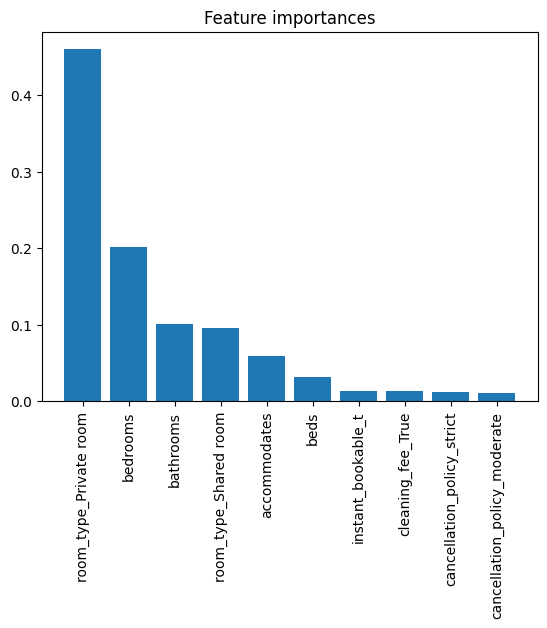

In [33]:
import matplotlib.pyplot as plt

# create bar chart of feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), X.columns[indices[:10]], rotation=90)
plt.show()


Pickle Model

In [35]:
import pickle

with open('model_pickle', 'wb') as f:
    pickle.dump(rf, f)

KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#fit the model
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Predicted class
y_pred3=neigh.predict(X_test)

In [ ]:
KNNmod = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred3.flatten()})
KNNmod

,Actual,Predicted
0,4.779123,4.648114
1,4.382027,5.080542
2,3.555348,5.076043
3,4.553877,4.740752
4,5.247024,4.980620
...,...,...
22168,3.912023,4.590171
22169,5.783825,5.701101
22170,4.094345,5.125253
22171,4.867534,4.848483


In [ ]:
# Calculate the accuracy of the model 
print(neigh.score(X_test, y_test)) 

0.4134559340359798
